<a href="https://colab.research.google.com/github/mdnawabali/Netflix-Movies-TV-shows-Clustering/blob/main/Netflix_Movies_%26_TV_shows_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Netflix Movies & TV shows clustering (Unsupervised ML)



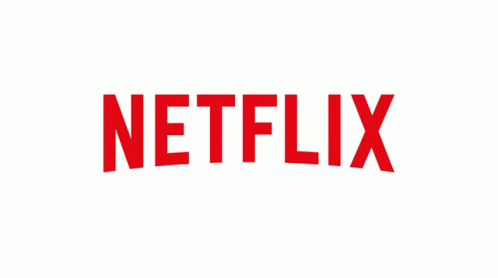

##### **Project Type**    - Unsupervised Machine learning
##### **Contribution**    - Team
##### **Team Member 1 - Kaustubh Amare**
##### **Team Member 2 - Md. Nawab Ali**
##### **Team Member 3 - Jahnavi Jaolekar**


# **Project Summary -**

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine. In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service's number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Approaches:-

**Step 1** - Viewing and cleaning data being the initials, we started with importing necessary libraries, mounting drive and storing data in variables for deriving meaningful insights. Next step being data analysis and visualization, where we analyzed our data distribution as univariate, bivariate and multivariate plots. Multicollinearity check was performed.

**Step 2** - We performed 3 hypothesis testing one comparing means for two variavles using T-test , second was asssociation of target age and country using chi_square test, last was asssociation of target age and duration using chi_square test.

**Step 3** - Presence of null values would have created possible errors in the further steps, so we replaced few values with null, few with the word "unknown" few were dropped.

**Step 4** - As a part of feature engineering we have done textual data processing which includes:expand contraction, lower casing, removing punctuations and stopwords, normalization,and vectoriztion. We performed data scaling using standardscalar, and dimensionality reduction using PCA.

**Step 5** - Last step was to perform clustering using different algorithms, we tried K-Means, ElbowCurve, DBSCAN, Dendogram, Agglomerative Clustering. Recommendation system function was also developed.

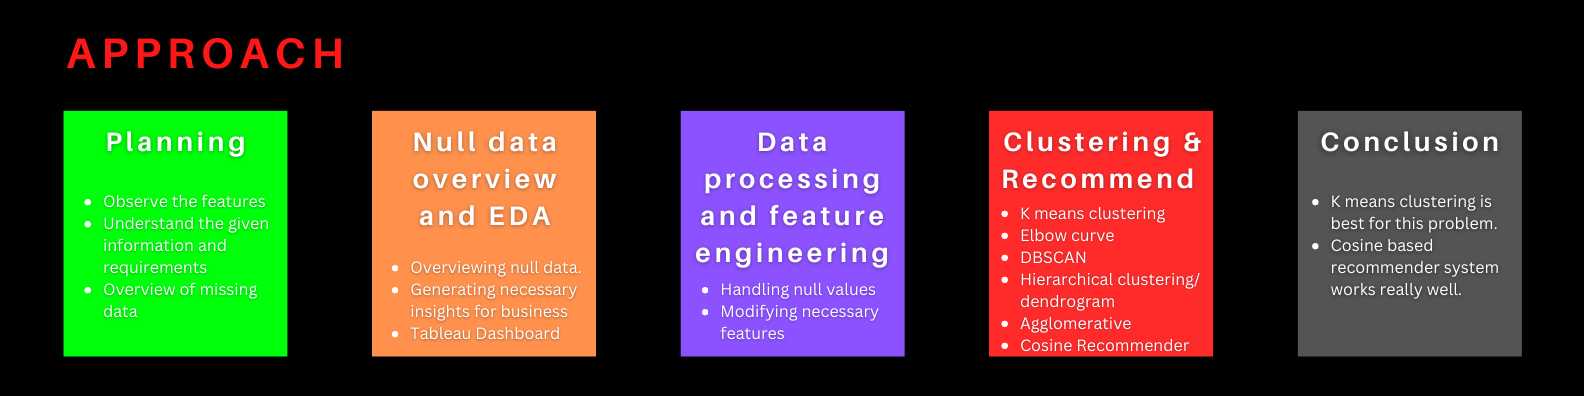

# **GitHub Link -**

# **Problem Statement**


**This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine. In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service's number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.
Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
#neccessary packages
!pip install xplotter --upgrade
!pip install pycountry-convert
!pip install geopy
!pip install folium
!pip install geopandas
###################
import pandas as pd
import numpy as np

import missingno as msno

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.cm as cm



%matplotlib inline

# Importing Date & Time util modules
from dateutil.parser import parse

import collections as c


import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS

#for nlp
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split, KFold
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
import string
string.punctuation
nltk.download('omw-1.4')
from nltk.tokenize import TweetTokenizer
from bs4 import BeautifulSoup
from nltk import word_tokenize, sent_tokenize
from nltk.stem import LancasterStemmer, WordNetLemmatizer

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.decomposition import PCA

from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples
import scipy.cluster.hierarchy as sch


import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Importing Date & Time util modules
from dateutil.parser import parse

import collections as c


# Xplotter
from xplotter.insights import *
from xplotter.formatter import format_spines

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


### Dataset Loading

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load Dataset
content_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ Netflix Movies & TV shows clustering/NETFLIX MOVIES AND TV SHOWS CLUSTERING (1).csv')

### Dataset First View

In [ ]:
# Dataset First Look
content_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
rows=content_df.shape[0]
columns=content_df.shape[1]
print(f'Number of rows in dataset are {rows}')
print(f'Number of columns in dataset are {columns}')

Number of rows in dataset are 7787
Number of columns in dataset are 12


### Dataset Information

In [ ]:
# Dataset Info
content_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
content_df.duplicated().sum()

0

#### Function for extracting complete information of all columns in data set. Information as follows
* Missing values
* Percentage of missing values
* unique values

In [ ]:
# function for determination of null values, uniques values in columns and there features.
def Complete_columns_info(df):
        mis_val =df.isna().sum()
        mis_val_percent = 100 *df.isna().sum() / len(df)
        unique_val= df.nunique()
        cci_table = pd.concat([mis_val, mis_val_percent, unique_val], axis=1)
        cci_table = cci_table.rename(columns = {0 : 'No of Null Values', 1 : '% of null values', 2 : 'No of unique values' })
        cci_table['Data Type'] = df.dtypes
        cci_table = cci_table.sort_values('% of null values', ascending=False).round(1)
        print (" selected dataframe has " + str(df.shape[1]) + " columns and " + str(df.shape[0]),"rows")
        return cci_table

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
Complete_columns_info(content_df)

 selected dataframe has 12 columns and 7787 rows


,No of Null Values,% of null values,No of unique values,Data Type
director,2389,30.7,4049,object
cast,718,9.2,6831,object
country,507,6.5,681,object
date_added,10,0.1,1565,object
rating,7,0.1,14,object
show_id,0,0.0,7787,object
type,0,0.0,2,object
title,0,0.0,7787,object
release_year,0,0.0,73,int64
duration,0,0.0,216,object


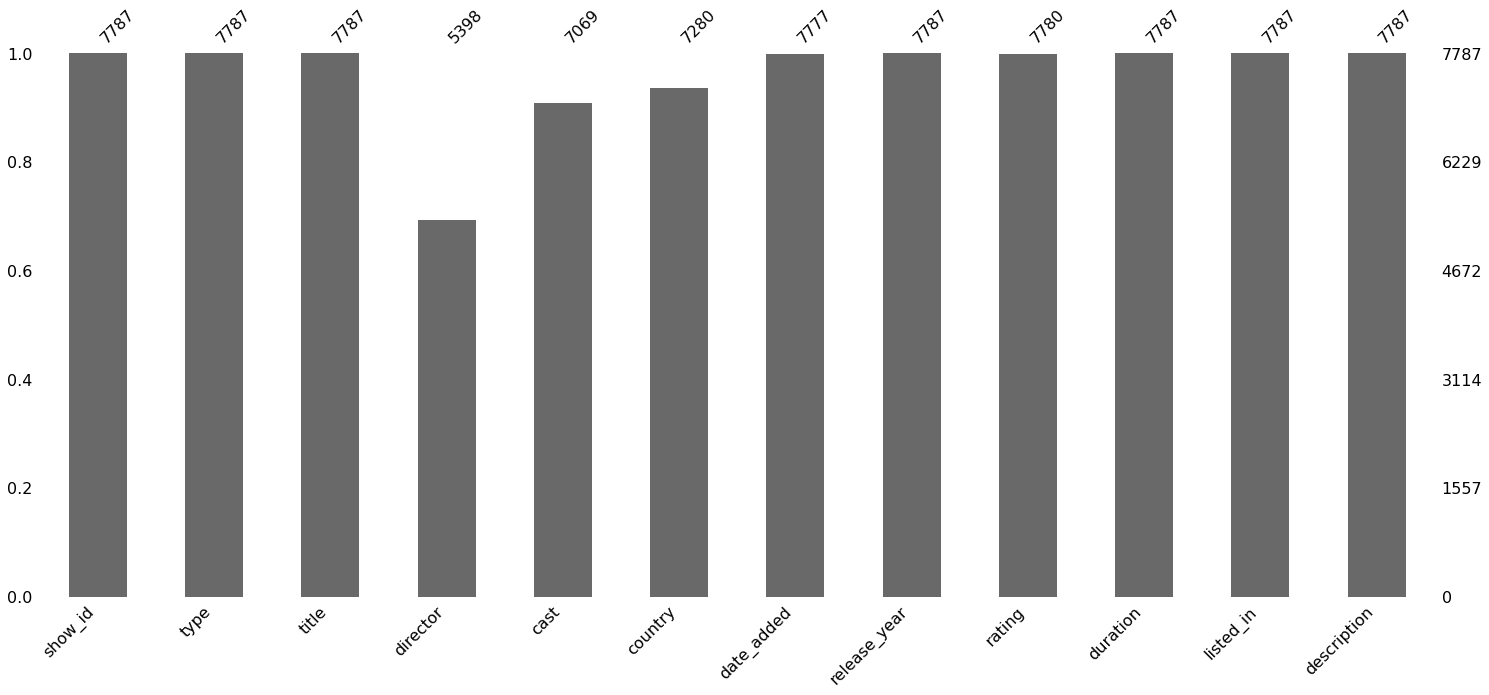

In [ ]:
# Visualizing the missing values
msno.bar(content_df)

### What did you know about your dataset?

Answer Here: 

*   This dataset has 7787 rows and 12 columns.
*   Dataset is free from duplicate values.

*   Director column has maximum percentage of null values almost 30%, followed by cast and country columns with 9.2 and 6.7 % of null values respectively.
*   All columns have data of object type except release_year which is integer type, which means we have only one numerical column in the dataset.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
content_df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [ ]:
# Dataset Describe
content_df.describe().style.background_gradient().set_properties(**{'border': '1.3px solid red',
                          'color': 'black'})

,release_year
count,7787.000000
mean,2013.932580
std,8.757395
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2018.000000
max,2021.000000


### Variables Description 

Answer Here:

#### Column Details

| Field | Description || Field | Description |
|-------|-------------||-------|-------------|
|Show_id|Unique id for every movie/TV show||Release_year|Actual release year of the show|
|Type|Identifier - Movie/tv show||Rating|TV rating of the show|
|Title|Title of the show/movie||Duration|Total duration in minutes or number of seasons|
|Director|Director of the show||Listed_in|Genre|
|Cast|Actors involved||Description|Summary description|
|Country|Country of production||Date_added|Date it was added on netflix|

### Check Unique Values for each variable.

In [ ]:
Complete_columns_info(content_df)

 selected dataframe has 12 columns and 7787 rows


,No of Null Values,% of null values,No of unique values,Data Type
director,2389,30.7,4049,object
cast,718,9.2,6831,object
country,507,6.5,681,object
date_added,10,0.1,1565,object
rating,7,0.1,14,object
show_id,0,0.0,7787,object
type,0,0.0,2,object
title,0,0.0,7787,object
release_year,0,0.0,73,int64
duration,0,0.0,216,object


## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.
# Create new features to store date, day, month and year seperately :
# First convert date_added to date time format.
content_df["date_added"] = pd.to_datetime(content_df['date_added'])
  
# Compute day. 
content_df['day_added'] = content_df['date_added'].dt.day   

# Compute year.         
content_df['year_added'] = content_df['date_added'].dt.year

# Compute mount.
content_df['month_added'] = content_df['date_added'].dt.month  

#  Creating two extra columns 
tv_shows=content_df[content_df['type']=='TV Show']
movies=content_df[content_df['type']=='Movie']

# duration manipulation for movie
movies.duration = movies.duration.str.replace(' min','').astype(int)

# duration manipulation for tv shows
tv_shows.rename(columns={'duration':'seasons'}, inplace=True)
tv_shows.replace({'seasons':{'1 Season':'1 Seasons'}}, inplace=True)
tv_shows.seasons = tv_shows.seasons.str.replace(' Seasons','').astype(int)

# Splitting datasets for movies and tv show
df_movies = content_df[content_df['type']=='Movie'].copy()
df_shows = content_df[content_df['type']=='TV Show'].copy()

# fixing data types
custom_rating = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}
content_df['ratings_cat'] = content_df['rating'].replace(to_replace = custom_rating)
content_df['ratings_cat'].unique()

content_df['type'] = pd.Categorical(content_df['type'])

# ratings_cat is another category (4 classes)
content_df['ratings_cat'] = pd.Categorical(content_df['ratings_cat'], categories=['Kids', 'Older Kids', 'Teens', 'Adults'])

# changing dtype to string
content_df['type']= content_df['type'].astype('string')
content_df['title']= content_df['title'].astype('string')
content_df['director']= content_df['director'].astype('string')
content_df['cast']= content_df['cast'].astype('string')
content_df['country']= content_df['country'].astype('string')
content_df['rating']= content_df['rating'].astype('string')
content_df['listed_in']= content_df['listed_in'].astype('string')
content_df['description']= content_df['description'].astype('string')

### What all manipulations have you done and insights you found?

Answer Here:

*   Date time column was converted into datetime format and information like day, month and year was extracted from it into new columns.
*   Dataset was split into separate datasets with respect to 'type' column i.e., movie and TV shows for better insights.

*   Duration Manipulation: 
      * Movies dataframe: duration is converted into integer
      * TV shows dataframe: 'seasons' word was removed and only integer value was kept as number of seasons.



*   There were several categories in rating column so for better understanding we categorized it into 4 basic categories i.e., kids, older kids, teens and adults. 

*   Suitable columns datatypes were converted from object type to string format to make the data processable.










## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#**Univariate Analysis**

#### Chart - 1

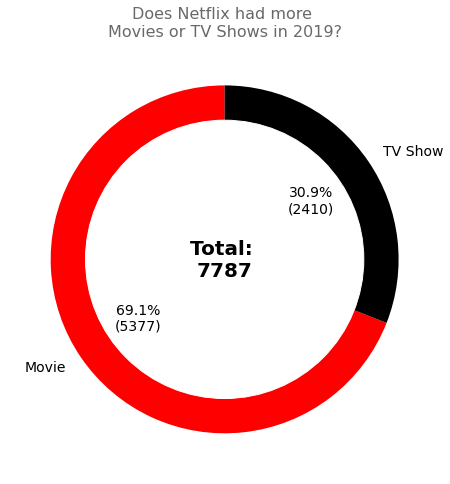

In [ ]:
# Balance of Netflix products
plot_donut_chart(df=content_df, col='type', colors=['red','black'], title='Does Netflix had more \nMovies or TV Shows in 2019?')

##### 1. Why did you pick the specific chart?

Answer Here: Donut chart is a great way to represent share of various attributes in total pool.

##### 2. What is/are the insight(s) found from the chart?

Answer Here: There are more number of movies **(~70%)** than TV shows **(~30%)** on netlix dataset. 

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here: 
There are less number of TV shows available, therefore we should promote TV shows production to ensure better audience retension due to more duration and story complexity.

 

#### Chart - 2

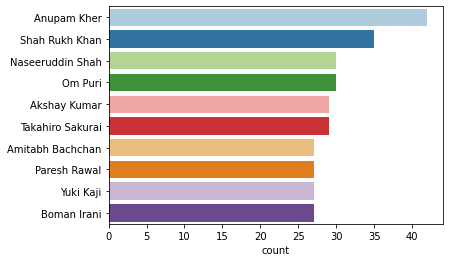

In [ ]:
# Chart - 2 visualization code
# Graph for top 10 actors
actors = content_df[content_df.cast != 'No Cast'].set_index('title').cast.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
sns.countplot(y = actors, order=actors.value_counts().index[:10], palette='Paired')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here: Bar charts are explainable because of their linear data representation. we have used bar charts to represent dependent variable ditribution, Vertical bar charts are useful to compare different categorical or discrete variables as long as they are too many categories to compare.

##### 2. What is/are the insight(s) found from the chart?

Answer Here: The above graph shows top 10 actors who have worked in loads of movies and TV shows  

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here: It will be better to cast popular actors as they have huge fanbase and better experience.

#### Chart - 3

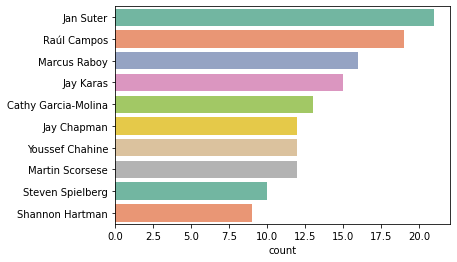

In [ ]:
# Chart - 3 visualization code
# graph for different rating on movies and tv shows
# Graph for top 10 directors
directors = content_df[content_df.director != 'No Director'].set_index('title').director.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
sns.countplot(y = directors, order=directors.value_counts().index[:10], palette='Set2')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here: we have used bar charts to represent dependent variable ditribution, Vertical bar charts are useful to compare different categorical or discrete variables as long as they are too many categories to compare. 

##### 2. What is/are the insight(s) found from the chart?

Answer Here: This visual shows Jan suter and Raul Campos are the leading directors, with abundant experience.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here: It will be better to cast popular actors as they have huge fanbase and better experience.

#### Chart - 4

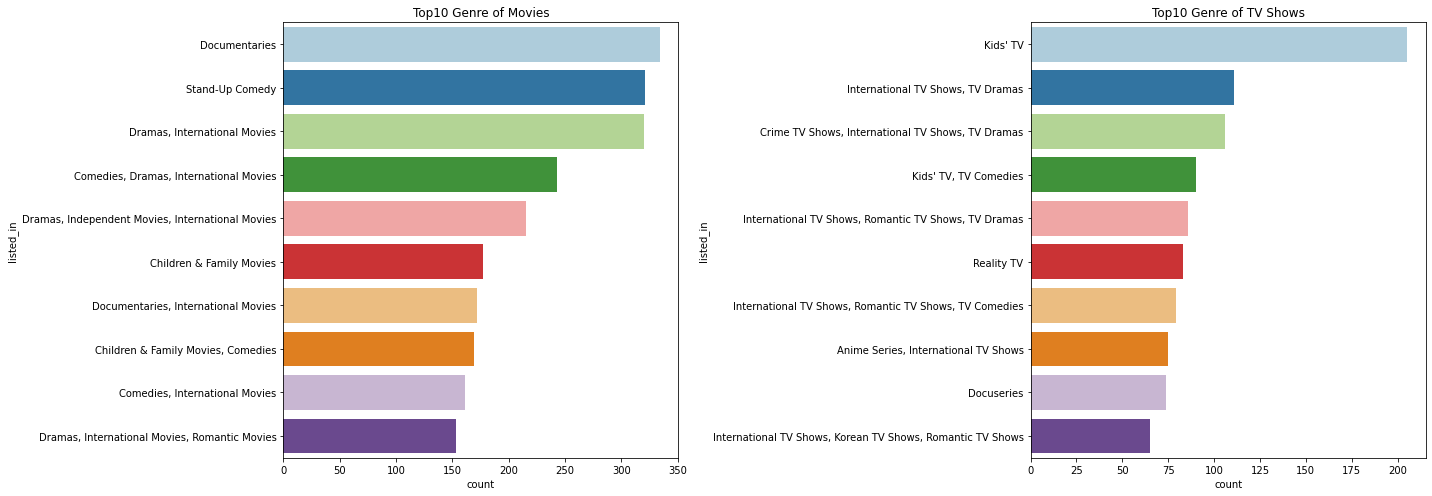

In [ ]:
# Chart - 4 visualization code
# #Analysing top10 genre of the movies
figure, ax= plt.subplots(nrows=1, ncols=2, figsize=(20,7))
sns.countplot(y=movies['listed_in'],data=movies,order=movies['listed_in'].value_counts().index[0:10],  palette='Paired', ax=ax[0])
ax[0].set_title('Top10 Genre of Movies')
# #Analysing top10 genres of TVSHOWS
sns.countplot(y=tv_shows['listed_in'],data=tv_shows,order=tv_shows['listed_in'].value_counts().index[0:10], palette='Paired', ax=ax[1])
ax[1].set_title('Top10 Genre of TV Shows')

plt.tight_layout()

##### 1. Why did you pick the specific chart?

Answer Here: we have used bar charts to represent dependent variable ditribution, Vertical bar charts are useful to compare different categorical or discrete variables as long as they are too many categories to compare.

##### 2. What is/are the insight(s) found from the chart?

Answer Here:

*   Documentaries are the top most genre in the netflix movies
*   Kids TV is the top most genre in netflix TV shows.



##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here:
According to personal experience and observation comedy movies are more preferred but are less in database, thus it should be promoted to attract wide audience.

#### Chart - 5

Text(0.5, 0, 'Month -> (Content added to Netflix) ')

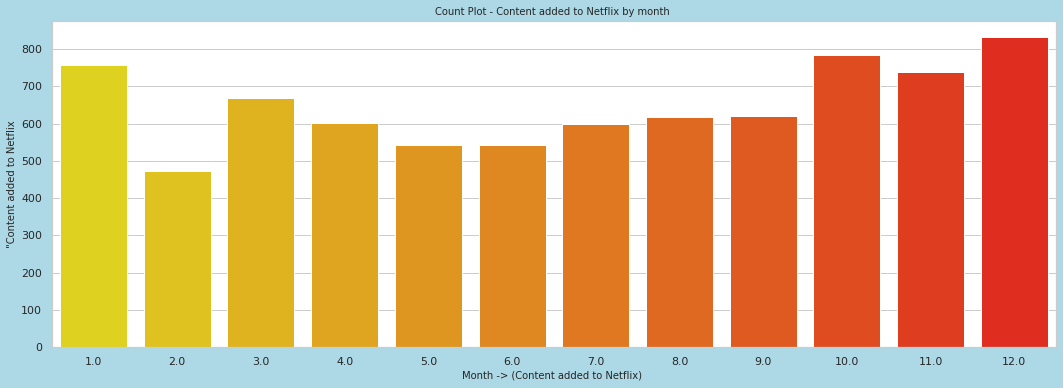

In [ ]:
# Chart - 5 visualization code
fig = plt.figure(figsize=(18,6))
sns.set(style='whitegrid')
fig.set_facecolor("lightblue")
sns.countplot(data=content_df,x = 'month_added',palette ="autumn_r")
plt.title('Count Plot - Content added to Netflix by month ', fontsize=10)
plt.ylabel('"Content added to Netflix', fontsize=10)
plt.xlabel('Month -> (Content added to Netflix) ', fontsize=10)
     

##### 1. Why did you pick the specific chart?

Answer Here: we have used bar charts to represent dependent variable ditribution, Vertical bar charts are useful to compare different categorical or discrete variables as long as they are too many categories to compare. 

##### 2. What is/are the insight(s) found from the chart?

Answer Here: Most of the movies were found to be released in the month of october, november, december and january.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here: There is wide gap in new content release in mid year, so this can be filled.

#### Chart - 6

Text(0.5, 0, 'Year -> (Movies added to Netflix) ')

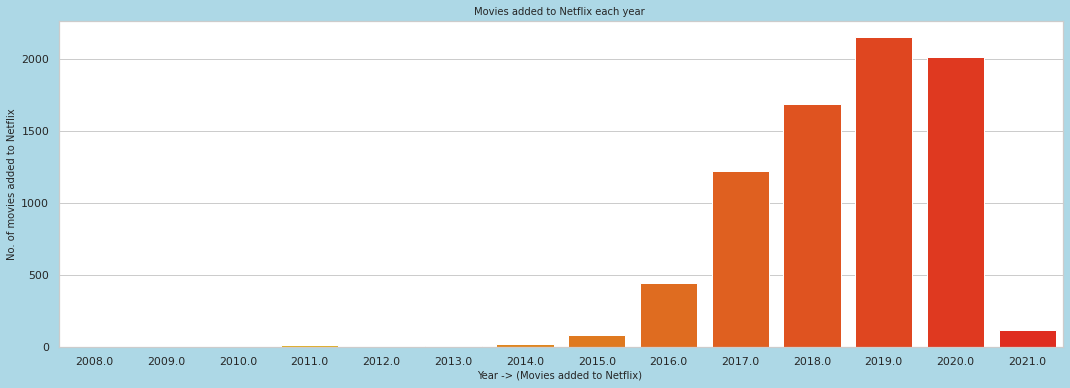

In [ ]:
# Chart - 6 visualization code
fig = plt.figure(figsize=(18,6))
sns.set(style='whitegrid')
fig.set_facecolor("lightblue")
sns.countplot(data = content_df,x = 'year_added',palette ="autumn_r")
plt.title('Movies added to Netflix each year ', fontsize=10)
plt.ylabel('No. of movies added to Netflix', fontsize=10)
plt.xlabel('Year -> (Movies added to Netflix) ', fontsize=10)

##### 1. Why did you pick the specific chart?

Answer Here: we have used bar charts to represent dependent variable ditribution, Vertical bar charts are useful to compare different categorical or discrete variables as long as they are too many categories to compare. 

##### 2. What is/are the insight(s) found from the chart?

Answer Here:
There is linear augmentation in the release of movies from the year 2015 with its peak in the year 2019 followed by a sudden downfall in the year 2021, which was due to covid (lockdown).

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here:
Due to covid outbreak large number of audience is inclining towards OTT platforms than physical theatres.

#### Chart - 7

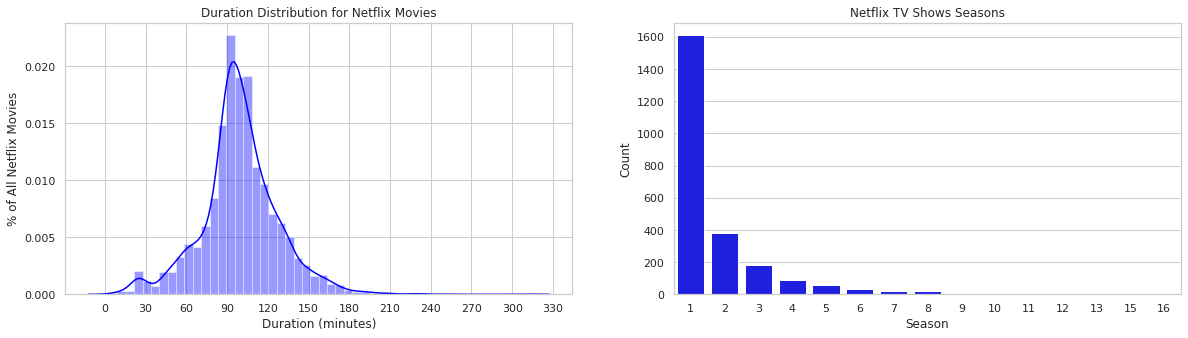

In [ ]:
# Chart - 7 visualization code
fig, ax = plt.subplots(1,2, figsize=(20, 5))
g1 = sns.distplot(movies.duration, color='blue',ax=ax[0]);
g1.set_xticks(np.arange(0,360,30))
g1.set_title("Duration Distribution for Netflix Movies")
g1.set_ylabel("% of All Netflix Movies")
g1.set_xlabel("Duration (minutes)")
g2 = sns.countplot(tv_shows.seasons, color='blue',ax=ax[1]);
g2.set_title("Netflix TV Shows Seasons")
g2.set_ylabel("Count")
g2.set_xlabel("Season")
fig.show()

##### 1. Why did you pick the specific chart?

Answer Here: Histograms have been used to represent distribution of columns having numerical data, histogram is basically used to represent data provided in a form of some groups.It is accurate method for the graphical representation of numerical data distribution.It is a type of bar plot where X-axis represents the bin ranges while Y-axis gives information about frequency.

##### 2. What is/are the insight(s) found from the chart?

Answer Here: 



*   Most of the movies have duration of 90 mins.
*   Most of the TV shows have one season, but this number goes on decreasing with increase in number seasons.


#### Chart - 8

([<matplotlib.patches.Wedge at 0x7f58de38ba60>,
 [Text(-1.0999663543761926, -0.008603443516892913, 'Others'),
  Text(1.1999632956831192, 0.00938557474570121, 'Originals')],
 [Text(-0.5999816478415596, -0.004692787372850679, '50.25%'),
  Text(0.6999785891484862, 0.005474918601659039, '49.75%')])

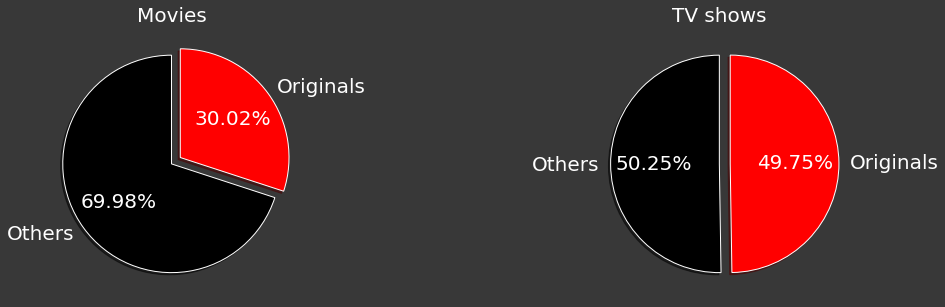

In [ ]:
# Chart - 8 visualization code
df_movies['originals'] = np.where(df_movies['release_year'] == df_movies['year_added'], 'Yes', 'No')
# pie plot showing percentage of originals and others in movies
fig, ax = plt.subplots(nrows= 1, ncols=2, figsize=(18,5),facecolor="#383838")
explode = (0, 0.1)
ax[0].set_title('Movies', color='white', fontsize = 20)
ax[0].pie(df_movies['originals'].value_counts(), explode=explode, autopct='%.2f%%', labels= ['Others', 'Originals'],
       shadow=True, startangle=90,textprops={'color':"white", 'fontsize': 20}, colors =['black','red'])
# pie plot showing percentage of originals and others in TV_shows
df_shows['originals'] = np.where(df_shows['release_year'] == df_shows['year_added'], 'Yes', 'No')
ax[1].set_title('TV shows', color='white', fontsize = 20 )
ax[1].pie(df_shows['originals'].value_counts(), explode=explode, autopct='%.2f%%', labels= ['Others', 'Originals'],
       shadow=True, startangle=90,textprops={'color':"white", 'fontsize': 20}, colors =['black','red'])

##### 1. Why did you pick the specific chart?

Answer Here:  We have used pie chart to present education column, Pie Chart is a circular statistical plot that can display only one series of data. The area of the chart is the total percentage of the given data. The area of slices of the pie represents the percentage of the parts of the data.

##### 2. What is/are the insight(s) found from the chart?

Answer Here: 

*   Movies: 30% of the movies are netflix originals and remaining 70% movies are added on netflix which were released by different modes.
*   TV shows: 50% of the TV shows are netflix originals and remaining 50% TV shows are added on netflix which were released by different modes.



##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here: We can add more number of netflix original movies.

#**Bivariate Analysis**

#### Chart - 9

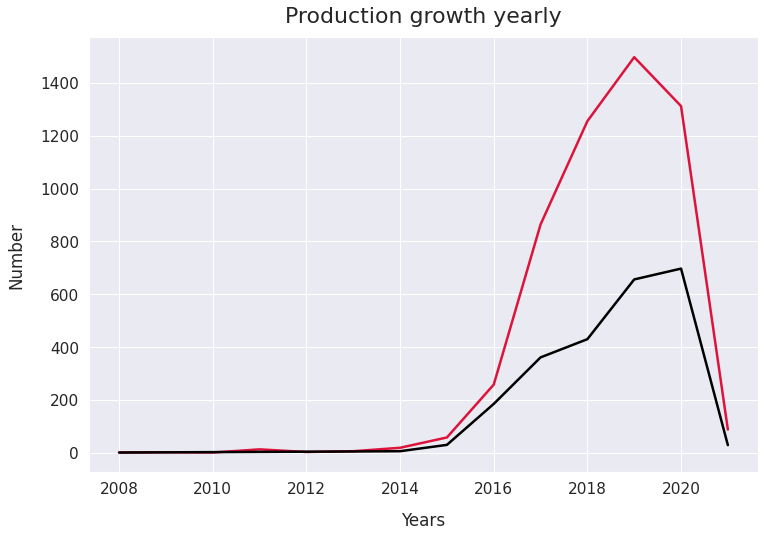

In [ ]:
# Chart - 9 visualization code
# visualizing the movies and tv_shows based on the release year
movies_year =movies['year_added'].value_counts().sort_index(ascending=False)
tvshows_year =tv_shows['year_added'].value_counts().sort_index(ascending=False)
sns.set(font_scale=1.4)
movies_year.plot(figsize=(12, 8), linewidth=2.5, color='crimson',label="Movies per year",ms=3)
tvshows_year.plot(figsize=(12, 8), linewidth=2.5, color='black',label="TV Shows per year")
plt.xlabel("Years", labelpad=15)
plt.ylabel("Number", labelpad=15)
plt.title("Production growth yearly", y=1.02, fontsize=22);

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here: In the year 2019 more number of movies were released as compared to TV shows.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here: There are less number of TV shows available, therefore we should promote TV shows production to ensure better audience retention due to more duration and story complexity.

#### Chart - 10

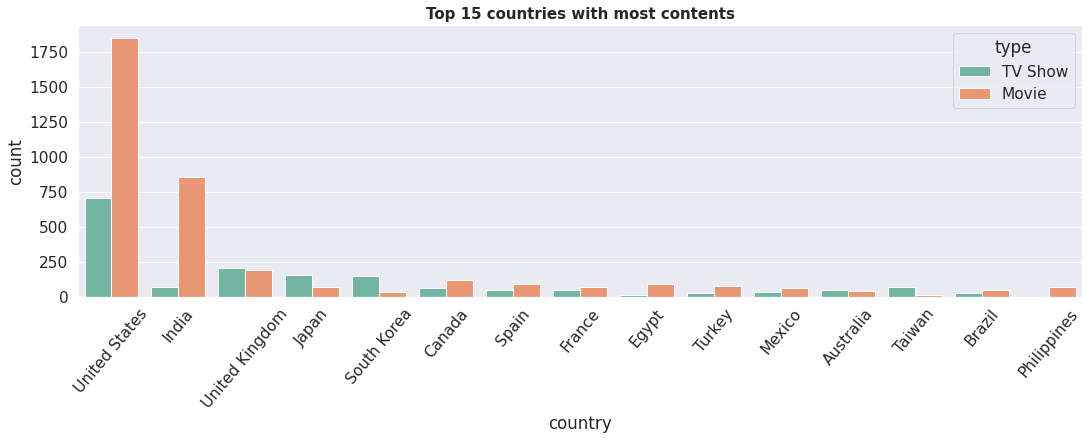

In [ ]:
# Chart - 10 visualization code
#Analysing top15 countries with most content 
plt.figure(figsize=(18,5))
sns.countplot(x=content_df['country'],order=content_df['country'].value_counts().index[0:15],hue=content_df['type'], palette='Set2')
plt.xticks(rotation=50)
plt.title('Top 15 countries with most contents', fontsize=15, fontweight='bold')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here: Multiple bar charts are extremely useful if you want to present a large amount of information in a small amount of space. Instead of having only one bar at each division on the horizontal axis. 

##### 2. What is/are the insight(s) found from the chart?

Answer Here: United States has highest number of contents in Netflix followed by India.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here: As we can see that very large variety of content is not available for India and severl other countries thus missing variety should be made available for other countries to provide better options for audience and to increase engagement.

#### Chart - 11

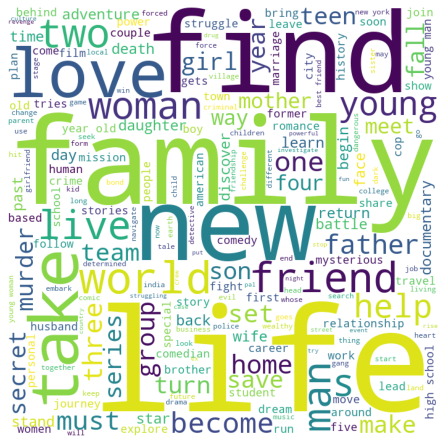

In [ ]:
# Chart - 11 visualization code
# Building a wordcloud for the movie descriptions
words = ''
stopwords = set(STOPWORDS)

# iterate through the csv file
for value in content_df.description.values:
    
    # typecaste each val to string
    value = str(value)

    # split the value
    tokens = value.split()
    
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
    
    words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 700, height = 700,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(words)


# plot the WordCloud image                      
plt.figure(figsize = (15,6), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

##### 1. Why did you pick the specific chart?

Answer Here: A word cloud (also known as a tag cloud or text cloud) is a visual representation of a text, in which the words appear bigger the more often they are mentioned. Word clouds are great for visualizing unstructured text data and getting insights on trends and patterns.


##### 2. What is/are the insight(s) found from the chart?

Answer Here: Family, Life, Find, Love are the most used words in the description column.

#### Chart - 12

<BarContainer object of 11 artists>

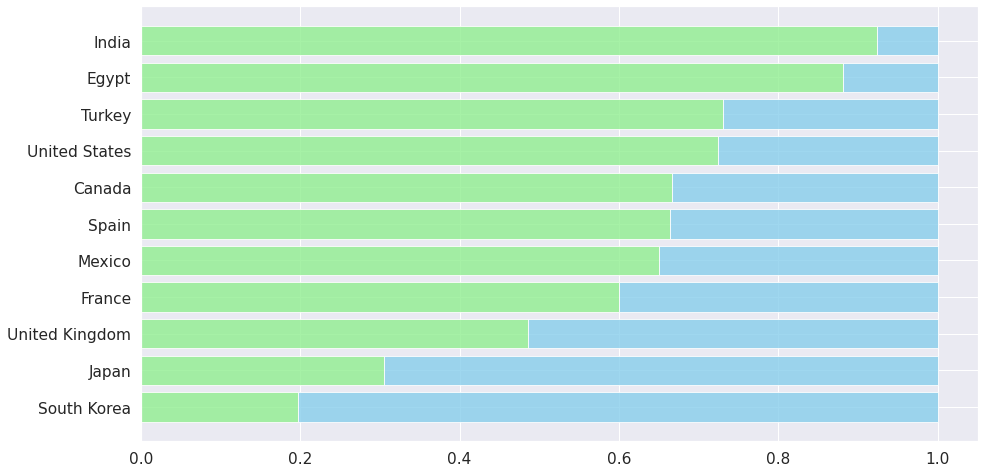

In [ ]:
# Chart - 12 visualization code
# Plotting the Horizontal bar plot for top 10 country contains Movie & TV Show split
country_order = content_df['country'].value_counts()[:11].index
content_data = content_df[['type', 'country']].groupby('country')['type'].value_counts().unstack().loc[country_order]
content_data['sum'] = content_data.sum(axis=1)
content_data_ratio = (content_data.T / content_data['sum']).T[['Movie', 'TV Show']].sort_values(by='Movie',ascending=False)[::-1]

# Plotting the barh
fig, ax = plt.subplots(1,1,figsize=(15, 8))

ax.barh(content_data_ratio.index, content_data_ratio['Movie'], 
        color='lightgreen', alpha=0.8, label='Movie')
ax.barh(content_data_ratio.index, content_data_ratio['TV Show'], left=content_data_ratio['Movie'], 
        color='skyblue', alpha=0.8, label='TV Show')   

##### 1. Why did you pick the specific chart?

Answer Here: Multiple bar charts are extremely useful if you want to present a large amount of information in a small amount of space. Instead of having only one bar at each division on the horizontal axis.

##### 2. What is/are the insight(s) found from the chart?

Answer Here: India has number of movies releases than TV shows followed by Egypt with highest movie releases and less TV shows.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

.Answer Here: India has less number TV shows as compared to other countries, thus this gap can be filled by producing more TV shows originated in India.

#### Chart - 13

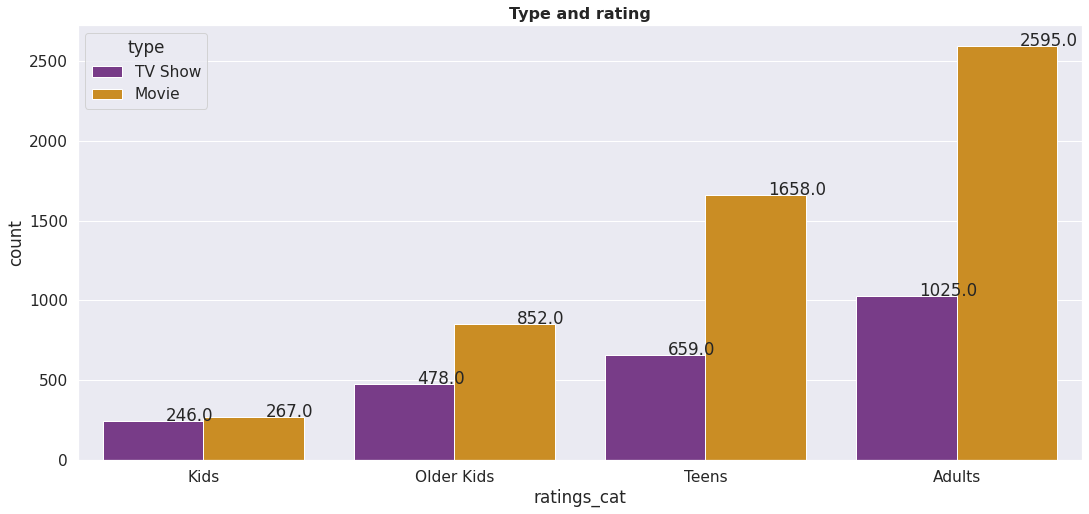

In [ ]:
# Chart - 13 visualization code
# Rating
plt.figure(figsize=(18,8))
ax=sns.countplot(x='ratings_cat',hue='type', data=content_df,palette="CMRmap")
plt.title('Type and rating',size='16',fontweight="bold")
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here: Multiple bar charts are extremely useful if you want to present a large amount of information in a small amount of space. Instead of having only one bar at each division on the horizontal axis. 

##### 2. What is/are the insight(s) found from the chart?

Netflix has more content in the adult section followed by teen section.

#**Multivariate Analysis**

#### Chart - 14 - Correlation Heatmap

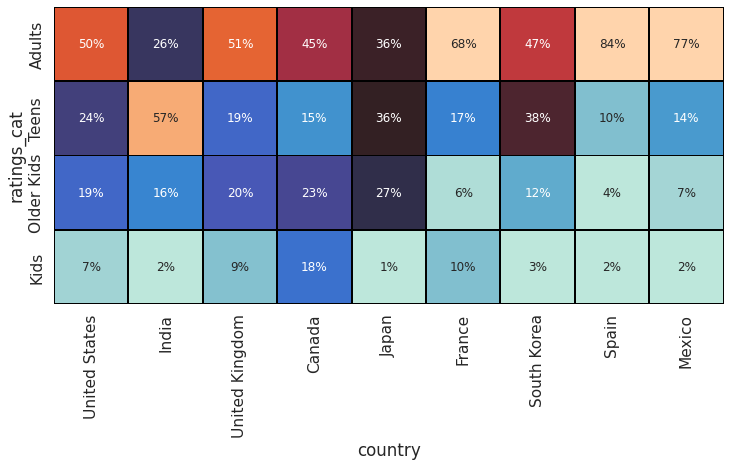

In [ ]:
# Correlation Heatmap visualization code
content_df['count'] = 1
data = content_df.groupby('country')[['country','count']].sum().sort_values(by='count',ascending=False).reset_index()[:10]
data = data['country']
heatmap_df = content_df.loc[content_df['country'].isin(data)]
heatmap_df = pd.crosstab(heatmap_df['country'],heatmap_df['ratings_cat'],normalize = "index").T

# Plotting the heatmap
fig, ax = plt.subplots(1, 1, figsize=(12, 12))
country_order2 = ['United States', 'India', 'United Kingdom', 'Canada', 'Japan', 'France', 'South Korea', 'Spain',
       'Mexico']
age_order = ['Adults', 'Teens', 'Older Kids', 'Kids']
sns.heatmap(heatmap_df.loc[age_order,country_order2],cmap='icefire',annot=True, linecolor='Black', linewidths=1.0,square=True, cbar=False,
            fmt='1.0%',vmax=.6,vmin=0.05,ax=ax,annot_kws={"fontsize":12})
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here: Correlations are best represented  using heat maps. Heat Maps is used to better visualize the volume of locations/events within a dataset and assist in directing viewers towards areas on data visualizations that matter most.

##### 2. What is/are the insight(s) found from the chart?

Answer Here: United States and United Kingdom are closely alighned with their netflix target ages. 

* Maximum adult content is from Spain.
* Maximum teen content is from India.
* Maximum older kids content is from Japan.
* Maximum kids content is from Canada.









#### Chart - 16 - Pair Plot 

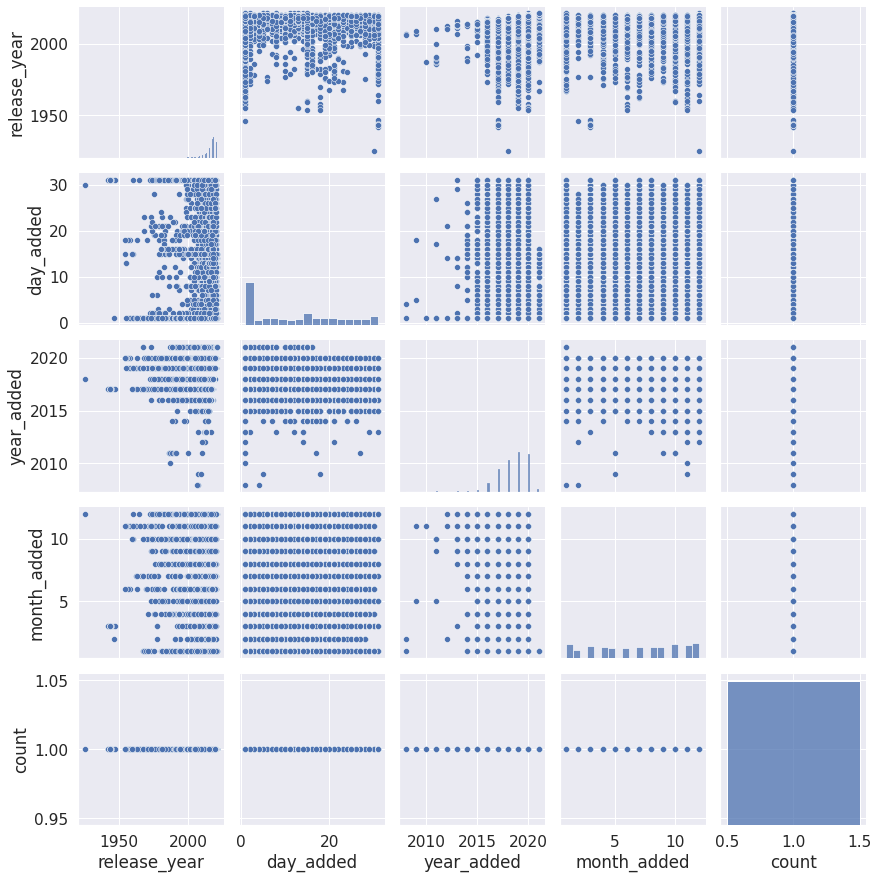

In [ ]:
# Pair Plot visualization code
# Checking relation among all the columns once to do further analysis 
sns.pairplot(data=content_df)

##### 1. Why did you pick the specific chart?

Answer Here - Pair plot is used to understand the best set of features to explain a relationship between two variables or to form the most separated clusters.

##### 2. What is/are the insight(s) found from the chart?

Answer Here: Movie release is not biased with respect to days or months, and no other relationship or trends can be observed from the pairplots.

###**Tableau Dashboard for Netflix Movies & TV Shows Clustering**

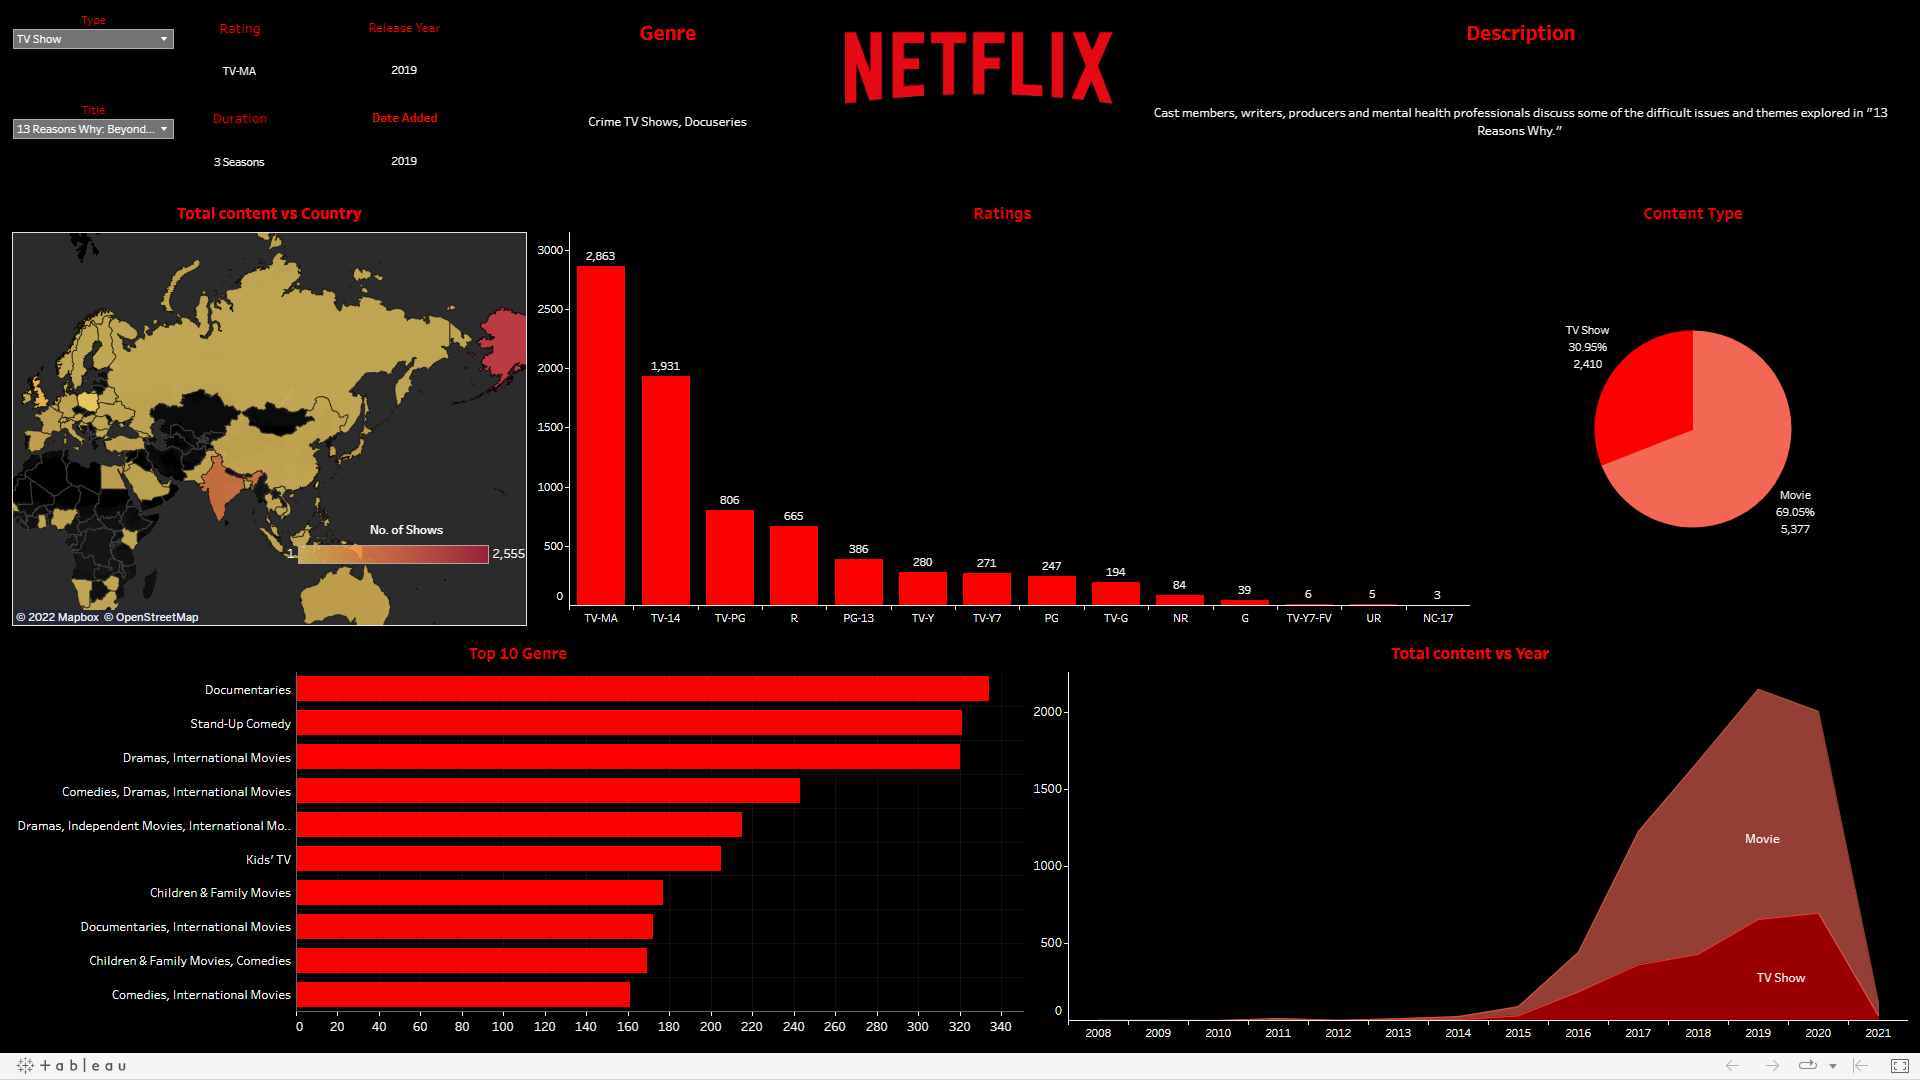

For interactive dashboard- [Click here](https://public.tableau.com/views/Netflixdasboard_16717379913640/NetflixDashboard?:language=en-US&:display_count=n&:origin=viz_share_link)  (please select fullscreen option given at bottom right corner of dashboard for better experience. )

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here:

*   H0 Hypothesis : Movies for kids and older kids are not two hours long. 
*   H1 Hypothesis : Movies for kids and older kids are two hours long.


#### 2. Perform an appropriate statistical test.

In [ ]:
# Making copy of df_clean_frame
hypothesis=content_df.copy()
hypothesis = hypothesis[hypothesis["type"] == "Movie"]
ratings_ages = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}
hypothesis['target_ages'] = hypothesis['rating'].replace(ratings_ages)
# Let's see unique target ages 
hypothesis['target_ages'].unique()
hypothesis['target_ages'] = pd.Categorical(hypothesis['target_ages'], categories=['Kids', 'Older Kids', 'Teens', 'Adults'])
# From duration feature extractin string part and after extracting Changing the object type to numeric
hypothesis['duration']= hypothesis['duration'].str.extract('(\d+)')
hypothesis['duration'] = pd.to_numeric(hypothesis['duration'])
# Head of df_
hypothesis.head(3)
# Group_by duration and target_ages                 
group_by_= hypothesis[['duration','target_ages']].groupby(by='target_ages')
# Mean of group_by variable
group=group_by_.mean().reset_index()
group
# In A and B variable grouping values 
one = group_by_.get_group('Kids')
two = group_by_.get_group('Older Kids')
# Mean and std. calutation for kids and older kids variables
Mean1 = one.mean()
SD1 = one.std()

Mean2= two.mean()
SD2 = two.std()

print('Mean for movies rated for Kids {} \n Mean for  movies rated for older kids {}'.format(Mean1,Mean2))
print('Std deviation for  movies rated for Older Kids {} \n Std for  movies rated for kids {}'.format(SD2,SD1))

Mean for movies rated for Kids duration    66.486891
dtype: float64 
 Mean for  movies rated for older kids duration    92.024648
dtype: float64
Std deviation for  movies rated for Older Kids duration    31.182577
dtype: float64 
 Std for  movies rated for kids duration    31.739465
dtype: float64


In [ ]:
# Perform Statistical Test to obtain P-Value
# Import stats 
from scipy import stats
# Length of groups and DOF
len1 = len(one)
len2= len(two)
print(len1,len2)

dof = len1+len2-2
print('dof',dof)

sp_2 = ((len2-1)*SD1**2  + (len1-1)*SD2**2) / dof
print('SP_2 =',sp_2)

sp = np.sqrt(sp_2)
print('SP',sp)

# t-value
t_value = (Mean1-Mean2)/(sp * np.sqrt(1/len1 + 1/len2))
print('t-value',t_value[0])

267 852
dof 1117
SP_2 = duration    999.049147
dtype: float64
SP duration    31.607739
dtype: float64
t-value -11.51992627853396


In [ ]:
stats.t.ppf(0.025,dof)

-1.9620900365868952

In [ ]:
stats.t.ppf(0.975,dof)

1.9620900365868947

thus we reject NUll hypothesis, movies for kids and older kids are two hours long.

##### Which statistical test have you done to obtain P-Value?

Answer Here: T-Test

##### Why did you choose the specific statistical test?

Answer Here: A t test is a statistical test that is used to compare the means of two groups. It is often used in hypothesis testing to determine whether a process or treatment actually has an effect on the population of interest, or whether two groups are different from one another.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here:

*   Null Hypothesis(H0) - The Country is independent of Target_ages.
 
*   Alternative Hypothesis(H1) - The Country is associated with Target_ages.

#### 2. Perform an appropriate statistical test.

In [ ]:
cont_table  = pd.crosstab(hypothesis.country, hypothesis.target_ages)
cont_table

target_ages,Kids,Older Kids,Teens,Adults
country,,,,
Argentina,1,2,5,26
"Argentina, Brazil, France, Poland, Germany, Denmark",0,0,1,0
"Argentina, Chile",0,0,1,0
"Argentina, Chile, Peru",0,0,0,1
"Argentina, France",0,0,0,1
...,...,...,...,...
Venezuela,0,0,1,0
"Venezuela, Colombia",0,0,0,1
Vietnam,1,0,2,2


In [ ]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import chi2_contingency
X2, p_value, degree_freedom, expected_values = chi2_contingency(cont_table, correction = True)
print("X2: {0}, P-Value: {1}".format(X2,p_value)) 

X2: 2490.454665821185, P-Value: 1.241778964066463e-27


* Thus we reject null hypothesis, Country is associated with target ages. 

##### Which statistical test have you done to obtain P-Value?

Answer Here: Chi Square Test

##### Why did you choose the specific statistical test?

Answer Here: A chi-square test is a statistical test used to compare observed results with expected results. The purpose of this test is to determine if a difference between observed data and expected data is due to chance, or if it is due to a relationship between the variables you are studying.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here:

*   Null Hypothesis(H0) - The Duration is independent of Target_ages.
 
*   Alternative Hypothesis(H1) - The Duration is associated with Target_ages.

#### 2. Perform an appropriate statistical test.

In [ ]:
cont_table_1  = pd.crosstab(hypothesis.target_ages, hypothesis.duration)
cont_table_1

duration,3,5,8,9,10,11,12,13,14,15,...,208,209,214,224,228,230,233,237,253,312
target_ages,,,,,,,,,,,,,,,,,,,,,
Kids,1,0,0,1,1,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Older Kids,0,0,0,0,0,0,1,1,1,2,...,0,0,0,1,0,0,1,0,0,0
Teens,0,1,1,0,0,0,0,0,2,0,...,0,1,1,0,1,1,0,1,1,0
Adults,0,0,0,0,0,0,1,0,0,0,...,1,1,0,0,0,0,0,0,0,1


In [ ]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import chi2_contingency
X2, p_value, degree_freedom, expected_values = chi2_contingency(cont_table_1, correction = True)
print("X2: {0}, P-Value: {1}".format(X2,p_value))

X2: 1942.6913060752477, P-Value: 3.3536893054183175e-141


* We reject the null hyposthesis, Duration is assosiated with target ages.

##### Which statistical test have you done to obtain P-Value?

Answer Here: Chi Square Test

##### Why did you choose the specific statistical test?

Answer Here: A chi-square test is a statistical test used to compare observed results with expected results. The purpose of this test is to determine if a difference between observed data and expected data is due to chance, or if it is due to a relationship between the variables you are studying.